# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [22]:
# Get the datasets
#Note: had to install wget on my env and modify the command a bit, this worked for me on Windows 11
!python -m wget http://huang.eng.unt.edu/CSCE-5218/test.dat -o F:\Deep_Learning\models\test.dat
!python -m wget http://huang.eng.unt.edu/CSCE-5218/train.dat -o F:\Deep_Learning\models\train.dat



Saved under F:\Deep_Learning\models\test (1).dat

Saved under F:\Deep_Learning\models\train (1).dat


In [23]:
# Take a peek at the datasets
#!head train.dat
with open('train.dat') as f:
    for _ in range(10):
        print(f.readline())
#!head test.dat
with open('test.dat') as f:
    for _ in range(10):
        print(f.readline())

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	

1	1	0	0	0	0	0	0	1	1	0	0	1	0

0	0	1	1	0	1	1	0	0	0	0	0	1	0

0	1	0	1	1	0	1	0	1	1	1	0	1	1

0	0	1	0	0	1	0	1	0	1	1	1	1	0

0	1	0	0	0	0	0	1	1	1	1	1	1	0

0	1	1	1	0	0	0	1	0	1	1	0	1	1

0	1	1	0	0	0	1	0	0	0	0	0	1	0

0	0	0	1	1	0	1	1	1	0	0	0	1	0

0	0	0	0	0	0	1	0	1	0	1	0	1	0

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13

1	1	1	1	0	0	1	1	0	0	0	1	1	0

0	0	0	1	0	0	1	1	0	1	0	0	1	0

0	1	1	1	0	1	1	1	1	0	0	0	1	0

0	1	1	0	1	0	1	1	1	0	1	0	1	0

0	1	0	0	0	1	0	1	0	1	0	0	1	0

0	1	1	0	0	1	1	1	1	1	1	0	1	0

0	1	1	1	0	0	1	1	0	0	0	1	1	0

0	1	0	0	1	0	0	1	1	0	1	1	1	0

1	1	1	1	0	0	1	1	0	0	0	0	1	0



### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [24]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    #return NotImplemented
    return sum(list(map(lambda i, j: i * j, array1, array2)))

def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    #return NotImplemented
    return (1 / (1 + math.exp(-x)))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    #return NotImplemented
    return sigmoid(dot_product(instance, weight))
# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    #return NotImplemented
    return (1 if output(weights, instance) >= 0.5 else 0)

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not need to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #adding in bias weights for initialization
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #calculate product of weights with input value
            in_value = dot_product(weights, instance)
            #run through the activation function
            output = sigmoid(in_value)
            #output = predict(weights,instance)
            #calculate the error of prediction with ground truth
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                #update weights through gradient descent
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [25]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the following code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
Predict makes use of a heavy side step function with threshold of 0.5 on top of the sigmoid activation thereby affecting the gradient to almost always be 0 which is not ideal for training.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [26]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
        size =  round(len(instances_tr)*tr_size/100)
        pre_instances = instances_tr[0:size]
        weights = train_perceptron(pre_instances, lr, epochs)
        accuracy = get_accuracy(weights, instances_te)
        print(f"# tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

# tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 100, epo

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)




From the results of question 2 and the subsequent plots formed in the next cell we observe that merely increasing the overall sample size, by itself, does increase accuracy to some extent. We observer that in general having a sample size of around 300 perorms better that having 20 sample. However we also observe that with fine tuning of the learning rate as well asthe number of epochs, we obtain a similar level of accuracy with a training size of 300 to that of having a training size of 400. Therefore, while we do see an increase in accuracy with higher number of training samples, it still required the tuning of the other hyperparameters to obtain better performance.


Looking over a particular set of results shown below, we notice that there is a decrease in accuracy where the training set is larger.
tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0

This is due to the fact that reducing the learning rate would increase the number of epochs or steps needed to reach the minimal error point. So while the number of epochs is the same, the gradient descent hasn't reached the same point that it would with the learning rate of 0.05. Also worth noting is the fact that while having a higher learning rate might reach the local minimum faster, it still has the risk of overshooting the mark. In oder to avoid shuch issues there are models which tend to decrease the learning rate the closer the model gets to the minimum.

We also observe that adding more hyperparameters increases the performance of the model in terms of accuracy. the model with training sample of 300 with a leaning rate of 0.005 performs better than the model with the same learning rate and having training samples of 400 past the epoch range of 40. So while adding more hyperparameters than the ones considered may increase accuracy beyond 80, we also run the risk of overfitting the data that might result in highly accurate training and extremely poor performance with any new data fed to the model.


Another observation made is that increasing the number of epochs is done to facilitate reaching close to the minimum error point. Once the model reaches its respective point merely increasing the number of epochs will not provide a better result. Hence, some models tend to stop executions when the output remains the same for a certain number of epochs. In the case of having a high learning rate, again due to the risk of going past the minimum error point and proceeding back and forth, we may notice a degradation of performan past a certain point as evident from the plot with the learning rate of 0.05 where the accuracy started sloping downwards after a certain number of epochs.



C:\Users\Aniv Chakravarty\AppData\Local\Temp\ipykernel_2404\3907259880.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


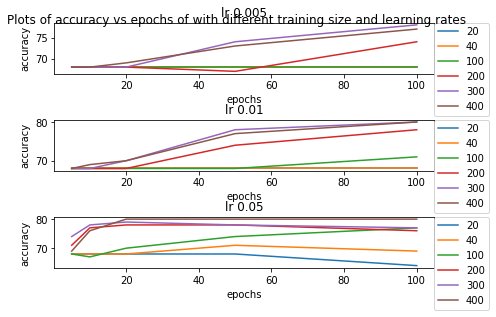

In [109]:
#Importing matplotlib for plotting graphs based on the output to check the accuracy with regards to training sizes, number of epochs and different learning rates. Also couldn't find any doc online for in-built python graph visualization for this optional task.

import matplotlib.pyplot as plt
%matplotlib inline

ac=[]
fig, ax = plt.subplots(3,1)
fig.tight_layout(h_pad=2.5)
for tr_size in tr_percent:
    ac=[]
    for epochs in num_epochs:
        size =  round(len(instances_tr)*tr_size/100)
        pre_instances = instances_tr[0:size]
        weights = train_perceptron(pre_instances, 0.005, epochs)
        accuracy = get_accuracy(weights, instances_te)
        ac.append(accuracy)
    ax[0].plot(num_epochs,ac,label=size)
    ax[0].legend(bbox_to_anchor=(1,1),loc='upper left', borderaxespad=0)
    ax[0].set_title("lr 0.005")
    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("accuracy")
for tr_size in tr_percent:
    ac=[]
    for epochs in num_epochs:
        size =  round(len(instances_tr)*tr_size/100)
        pre_instances = instances_tr[0:size]
        weights = train_perceptron(pre_instances, 0.01, epochs)
        accuracy = get_accuracy(weights, instances_te)
        ac.append(accuracy)
    ax[1].plot(num_epochs,ac,label=size)
    ax[1].legend(bbox_to_anchor=(1,1),loc='upper left', borderaxespad=0)
    ax[1].set_title("lr 0.01")
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("accuracy")
for tr_size in tr_percent:
    ac=[]
    for epochs in num_epochs:
        size =  round(len(instances_tr)*tr_size/100)
        pre_instances = instances_tr[0:size]
        weights = train_perceptron(pre_instances, 0.05, epochs)
        accuracy = get_accuracy(weights, instances_te)
        ac.append(accuracy)
    ax[2].plot(num_epochs,ac,label=size)
    ax[2].legend(bbox_to_anchor=(1,1),loc='upper left', borderaxespad=0)
    ax[2].set_title("lr 0.05")
    ax[2].set_xlabel("epochs")
    ax[2].set_ylabel("accuracy")
fig.suptitle("Plots of accuracy vs epochs of with different training size and learning rates")
fig.show()